# 📌 **Introduction**


---


In this task, we aim to perform a basic sales data analysis using **SQLite** and **Python**. SQLite is a lightweight, serverless database engine built into Python, making it ideal for small-scale projects and learning purposes.

We will:

- Create a local SQLite database (`sales_data.db`) with a single `sales` table.
- Execute SQL queries to calculate the total quantity sold and total revenue per product.
- Use **Pandas** to load and process the query results.
- Visualize the revenue data using a **bar chart** with **Matplotlib**.

This task demonstrates how SQL and Python can be combined to perform effective data summarization and visualization.

---

In [ ]:
import sqlite3

# Connect and create database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create a sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert  data
sample_data = [
    ("Apples", 30, 2.5),
    ("Bananas", 50, 1.2),
    ("Oranges", 40, 1.8),
    ("Apples", 20, 2.5),
    ("Bananas", 30, 1.2),
    ("Oranges", 25, 1.8),
    ("Grapes", 35, 3.0),
    ("Grapes", 20, 3.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


📦 Sales Summary:
   product  total_qty  revenue
0   Apples         50    125.0
1  Bananas         80     96.0
2   Grapes         55    165.0
3  Oranges         65    117.0


<Figure size 800x500 with 0 Axes>

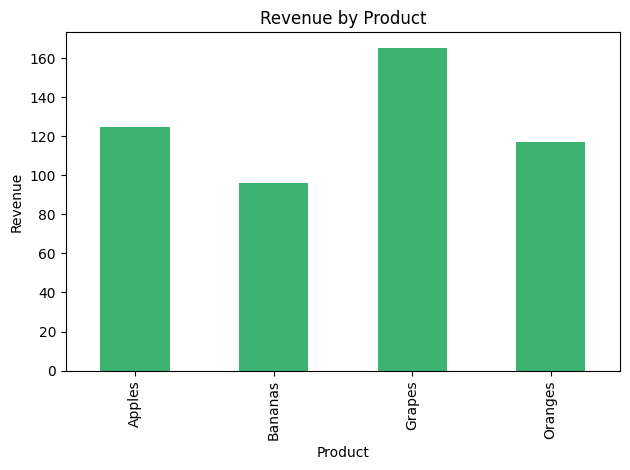

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load database
conn = sqlite3.connect("sales_data.db")

# SQL query for basic summary
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
"""

# Load into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print output
print("📦 Sales Summary:")
print(df)

# Bar chart for revenue by product
plt.figure(figsize=(8,5))
df.plot(kind='bar', x='product', y='revenue', color='mediumseagreen', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


### 📌 **Insights**

- We used SQL queries to **summarize sales data** by aggregating total quantity and revenue per product.
- The results were **successfully loaded into a Pandas DataFrame** for easy handling and display.
- A **bar chart** provided a clear visual comparison of revenue generated by each product.
- From the chart, we can easily identify which products contributed the most to total sales revenue.
- This task showcased the practical integration of SQL and Python for small-scale **data analysis and reporting** workflows.